In [1]:
from transformers import pipeline

## Importing models for sentiment analysis

In [8]:
pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis", framework='pt')

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [9]:
classifier = pipeline('sentiment-analysis', framework='pt')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

### Make predictions with models

In [15]:
classifier.predict('This is such a great movie!')

[{'label': 'POSITIVE', 'score': 0.9998759031295776}]

In [12]:
classifier('This movie sucks!')

[{'label': 'NEGATIVE', 'score': 0.9992454051971436}]

In [16]:
pipe('This is such a great movie!')

[{'label': 'neutral', 'score': 0.9649168848991394}]

In [13]:
pipe.predict('This movie sucks')

[{'label': 'negative', 'score': 0.9956799745559692}]

### Making multiple predictions

In [17]:
classifier([
    'This is an amazing movie!',
    'This is a terrible move'
])

[{'label': 'POSITIVE', 'score': 0.9998816251754761},
 {'label': 'NEGATIVE', 'score': 0.9987218976020813}]

## Using on a real dataset

In [20]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-06-17 11:06:05--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  8.92MB/s    in 0.4s    

2024-06-17 11:06:06 (8.92 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [34]:
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [22]:
classifier = pipeline('sentiment-analysis', framework='pt')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [25]:
df = pd.read_csv('data/AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [26]:
df = df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

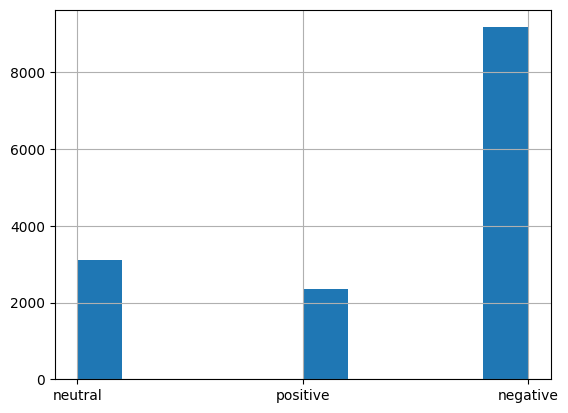

In [27]:
df['airline_sentiment'].hist()

In [28]:
df = df[df['airline_sentiment'] != 'neutral'].copy()

In [29]:
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [30]:
texts = df['text'].tolist()
predictions = classifier(texts)

In [31]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]
preds = np.array(preds)

In [32]:
cm = confusion_matrix(df['target'], preds)
print(cm)

[[8271  907]
 [ 364 1999]]


In [33]:
print(classification_report(df['target'], preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      9178
           1       0.69      0.85      0.76      2363

    accuracy                           0.89     11541
   macro avg       0.82      0.87      0.84     11541
weighted avg       0.90      0.89      0.89     11541

